In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [9]:
#looking at first 5 rows of df
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [10]:
#looking at bottom 5 rows of df
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


## Q5: How many rows and columns are in gdp_df? What are the data types of each column?

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


## answer: 
7662 rows, 4 columns: 
country/area - object; 
year - integer; 
value - float; 
value footnotes - float

## Q6: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [15]:
#df.drop("age", axis='columns') -- documentation for dropping a column
#gdp_df = gdp_df.drop('Value Footnotes', axis = 'columns')
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [19]:
#renaming remaining columns

gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})

In [20]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


## answer: see above

## Q7: How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [24]:
#unique values for year column
gdp_df['Year'].unique()
# 33 years total

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [25]:
gdp_df['Country'].value_counts()
# 242 countries total

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [38]:
grouped = gdp_df.groupby('Country')['Year'].count()
grouped

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [42]:
#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

group_new = gdp_df.groupby('Country')['Year'].count().reset_index()
group_new.sort_values('Year', ascending=False)

,Country,Year
121,Least developed countries: UN classification,33
143,Middle East & North Africa,33
145,Middle East & North Africa (excluding high inc...,33
146,Middle income,33
148,Mongolia,33
...,...,...
112,Kosovo,15
192,Sint Maarten (Dutch part),14
225,Turks and Caicos Islands,12
197,Somalia,10


In [51]:
group_new[group_new['Year'] < 33]
# list of countries missing data

,Country,Year
0,Afghanistan,20
10,Aruba,32
22,Bhutan,32
24,Bosnia and Herzegovina,29
32,Cambodia,30
36,Cayman Islands,16
46,Croatia,28
47,CuraÃ§ao,22
53,Djibouti,10
64,Estonia,28


## answer 7b above - list of countries missing data

In [48]:
group_new[group_new['Year'] < 33].count()
# of countries missing data = 40
# from line 25 above, there are 242 countries total
# 242 - 40 = 202 countries with all years of data

Country    40
Year       40
dtype: int64

## answer 7a: 202 countries have data for all years

In [26]:
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

## Q7c answer: all countries have data for 2013 - 2020, then all countries except 1 have data for 2021, then missing data for 10 countries in 2022

## Q8: In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [60]:
# creating variable for 2020 data
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]

In [61]:
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

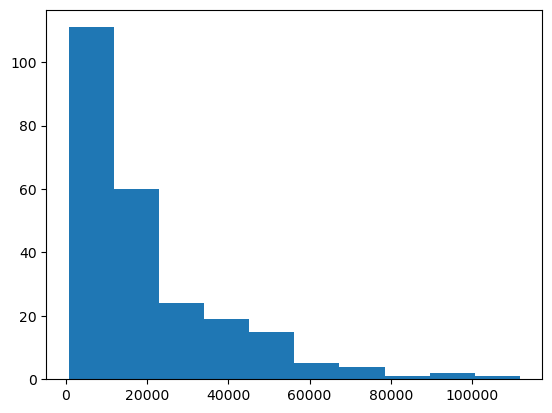

In [62]:
# histogram in matplotlib
plt.hist(gdp_2020.GDP_Per_Capita)

## histograms above and below

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

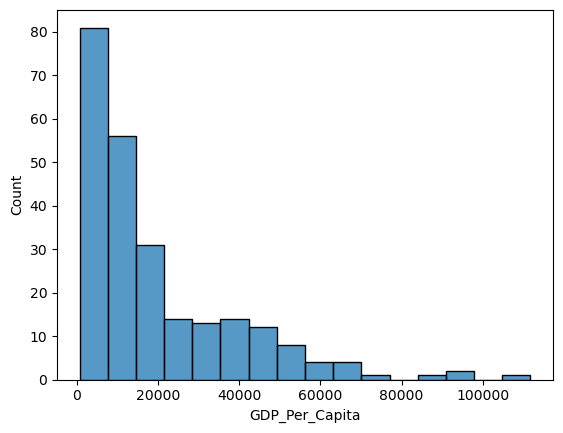

In [63]:
# histogram with Seaborn
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

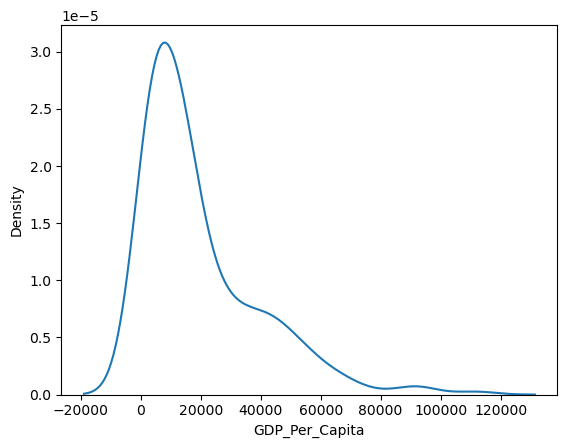

In [64]:
# Density plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

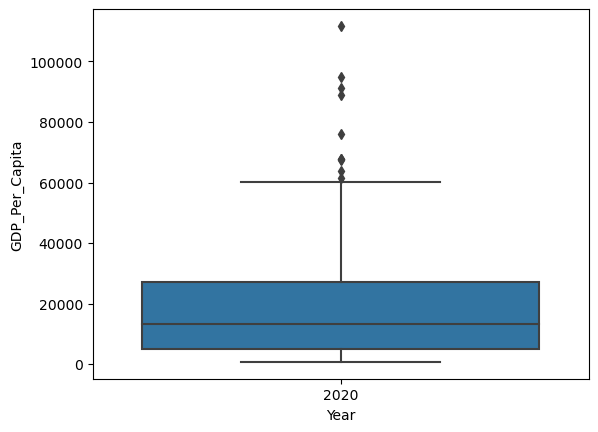

In [82]:
#boxplot
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

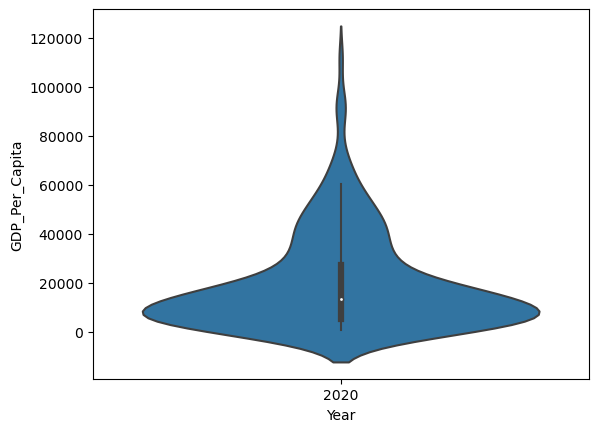

In [83]:
#violin plot
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

### Q8 observations: histogram probably the most useful - you can see how many countries have a GDP within a certain range; boxplot and violin plot - you can see the range of values

## Q9: What was the median GDP per capita value in 2020?

In [75]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [76]:
#median
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

## Q9 answer: 13357.997573370474

## Q10: For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot;
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn);
A scatterplot;
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn);
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [79]:
decades = (1990, 2000, 2010, 2020)
gdp_decades = gdp_df[gdp_df["Year"].isin(decades)]

In [80]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

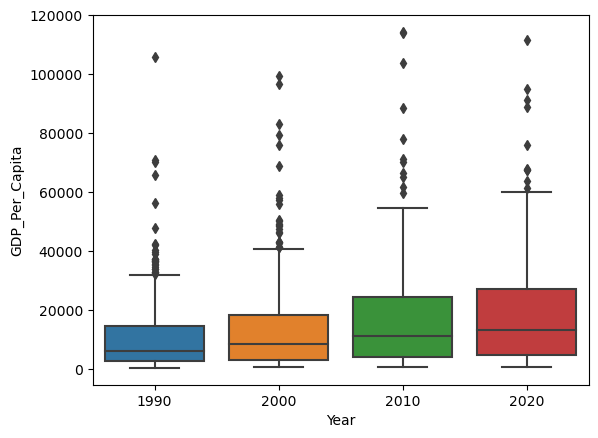

In [84]:
#boxplot
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
# strength - seeing outliers

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

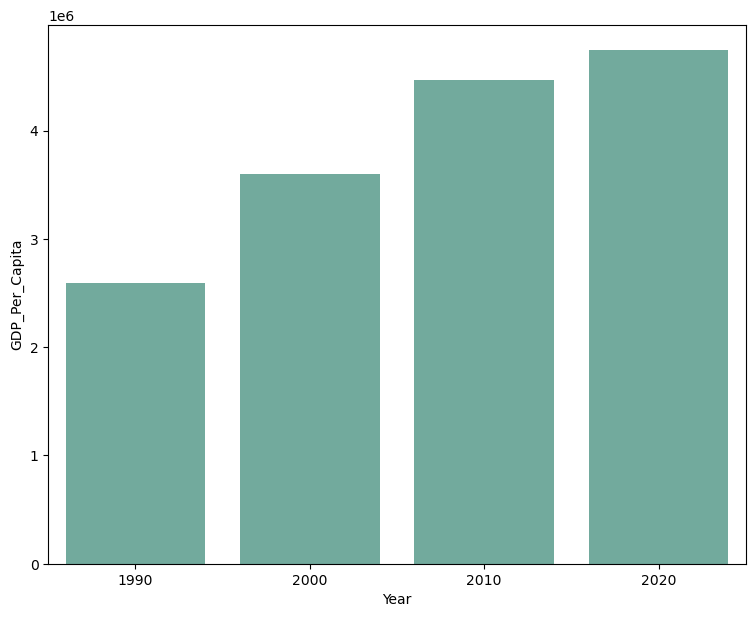

In [87]:
#barplot
plt.figure(figsize=(9, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2')
# strength: minimalist, simple; weakness: label is unclear? 

Text(0, 0.5, 'GDP per Capita')

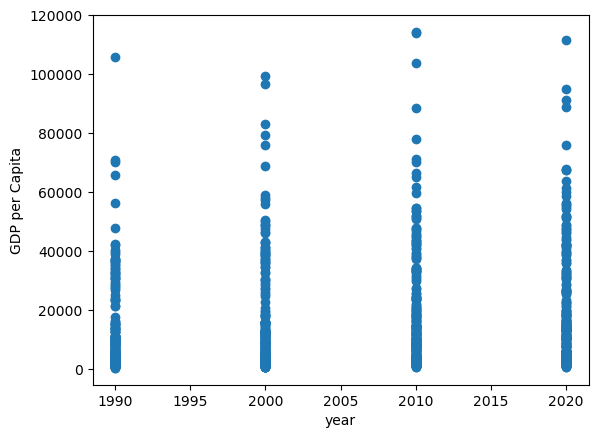

In [93]:
#scatterplot
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita )
plt.xlabel('year')
plt.ylabel('GDP per Capita')
#strength: see some distribution of values and how common certain values are; weakness: values tend to run together at bottom, not able to clearly see if values are increasing over time 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

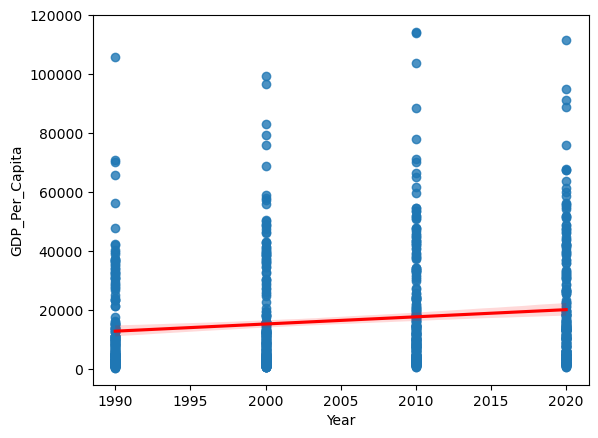

In [92]:
#scatterplot with a trend line overlaid
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"}
)
#strength: trendline able to show increase over time, which isn't as clear from the original scatterplot

### Q10 observation: GDP values are gradually rising over time. 

## Q11: Which country was the first to have a GDP per capita greater than $100,000?

In [94]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [96]:
gdp_df.sort_values(['Year', 'GDP_Per_Capita'], ascending = [True, False])

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
4178,Luxembourg,1990,70860.819124
904,Brunei,1990,70358.724094
711,Bermuda,1990,65961.406278
6775,Switzerland,1990,56232.026080
...,...,...,...
4822,Mozambique,2022,1243.073638
6271,Somalia,2022,1155.275773
1628,Dem. Rep. Congo,2022,1132.654233
1215,Central African Republic,2022,819.192343


## Q11 answer: United Arab Emirates in 1990

## Q12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [97]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


## Q12 answer: Luxembourg

In [99]:
gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [101]:
gdp_lux = gdp_lux.sort_values('Year')

In [102]:
gdp_lux.head()

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4177,Luxembourg,1991,75961.668717
4176,Luxembourg,1992,76323.304753
4175,Luxembourg,1993,78468.921760
4174,Luxembourg,1994,80365.224508


Text(0.5, 1.0, 'Luxembourg GDP over time')

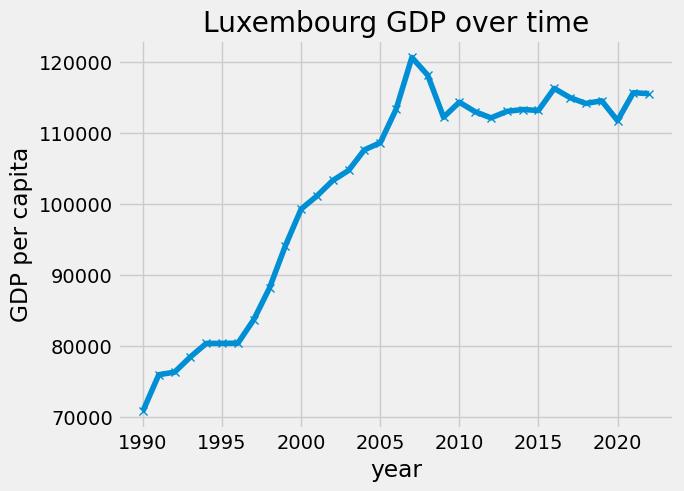

In [109]:
# line plot
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita, marker = 'x')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Luxembourg GDP over time')


## Q13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [110]:
gdp_2020.sort_values('GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


## Q13 answer: Burundi

In [111]:
gdp_bur = gdp_df[gdp_df['Country'] == 'Burundi']

In [114]:
gdp_bur = gdp_bur.sort_values('Year')
gdp_bur

,Country,Year,GDP_Per_Capita
1003,Burundi,1990,1175.155086
1002,Burundi,1991,1209.388158
1001,Burundi,1992,1190.067435
1000,Burundi,1993,1153.541309
999,Burundi,1994,1103.167298
998,Burundi,1995,956.490976
997,Burundi,1996,880.309412
996,Burundi,1997,867.284265
995,Burundi,1998,891.699844
994,Burundi,1999,862.006680


Text(0.5, 1.0, 'Burundi GDP over time')

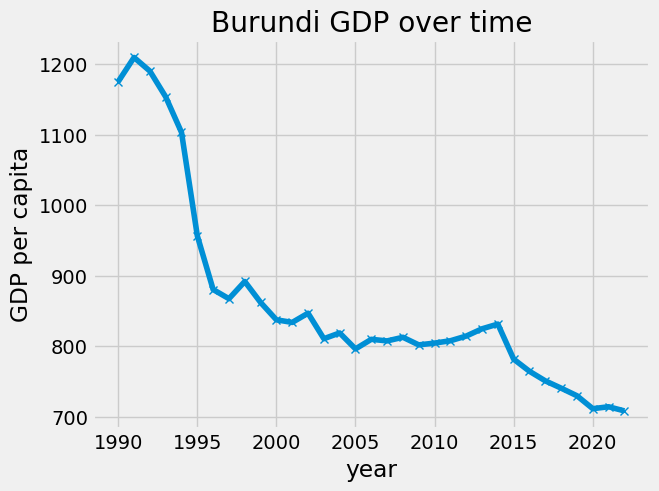

In [115]:
# line plot
plt.plot(gdp_bur.Year, gdp_bur.GDP_Per_Capita, marker = 'x')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Burundi GDP over time')

### Bonus: 

In [116]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [119]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


In [120]:
#creating variable for 1990 data
gdp_1990 = gdp_df[gdp_df["Year"] == 1990]
gdp_1990.describe()

,Year,GDP_Per_Capita
count,207.0,207.000000
mean,1990.0,12506.088374
std,0.0,15167.399935
min,1990.0,460.123697
25%,1990.0,2915.057031
50%,1990.0,6223.452994
75%,1990.0,14584.911473
max,1990.0,105893.626059


## Q13 Bonus answer part 1: Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Yes, based on mean and median above, GDP per capita higher in 2020.

## Q14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [157]:
#read in CSV, remove footnotes at end, starting at row 4495
internet_dfnew = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_dfnew.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [159]:
internet_dfnew.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [160]:
internet_dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


## Q15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [161]:
#drop column
#df = df.drop('column_name', axis=1)
internet_dfnew = internet_dfnew.drop('Value Footnotes', axis=1)


In [162]:
internet_dfnew.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [163]:
#renaming remaining columns
internet_dfnew = internet_dfnew.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'})

In [164]:
internet_dfnew.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


## Q15 answer: see above

## Q16: Look at the number of observations in this dataset per year. What do you notice?

In [168]:
internet_dfnew['Year'].value_counts(sort = False)

Year
2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
1990    210
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: count, dtype: int64

## Q16 answer: before 1990 only 8 countries had data for Internet usage; # jumps to 39 in 1991 and increases almost every year afterwards

## Q17: What is the first year to have a non-zero internet users percentage value?

In [171]:
#unique values for year column
internet_dfnew['Year'].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 1990, 2000, 1999, 1998, 1997, 1996, 1995, 1994,
       1993, 1992, 1991, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1970, 1965, 1960],
      dtype=int64)